In [53]:
import os
import json

from PIL import Image

## IAM

In [2]:
# ! wget --save-cookies data/cookies.txt \
#  --keep-session-cookies \
#  --post-data 'email=<EMAIL>&password=<PASSWORD>' \
#  --delete-after \
#  https://fki.tic.heia-fr.ch/login

In [3]:
# ! wget -P data/ \
#     --load-cookies data/cookies.txt \
#      https://fki.tic.heia-fr.ch/DBs/iamDB/data/words.tgz
# ! wget -P data/ \
#     --load-cookies data/cookies.txt \
#      https://fki.tic.heia-fr.ch/DBs/iamDB/data/lines.tgz
# ! wget -P data/ \
#     --load-cookies data/cookies.txt \
#      https://fki.tic.heia-fr.ch/DBs/iamDB/data/sentences.tgz
# ! wget -P data/ \
#     --load-cookies data/cookies.txt \
#      https://fki.tic.heia-fr.ch/DBs/iamDB/data/xml.tgz

In [5]:
# ! mkdir -p data/{words,sentences,xml,lines}

# ! tar -xzf data/words.tgz -C data/words
# ! tar -xzf data/lines.tgz -C data/lines
# ! tar -xzf data/sentences.tgz -C data/sentences
# ! tar -xzf data/xml.tgz -C data/xml

In [10]:
def get_image_paths(root_dir, data_level):
    image_paths = []
    for root, _, files in os.walk(os.path.join(root_dir, data_level)):
        for file in files:
            if file.endswith('.png'):
                image_paths.append(os.path.join(root, file))
    return image_paths


# Get IAM image paths
dataset_levels = ["lines", "sentences"] # "words"
hw_image_paths = []

for level in dataset_levels:
    hw_image_paths += get_image_paths("data/", level)

print(len(hw_image_paths))

30105


In [ ]:
def copy_files(destination_folder, file_path_list):
    for source_path in file_path_list:
        destination_path = os.path.join(destination_folder, source_path.split("/")[-1])
        shutil.copy2(source_path, destination_path)

## FUNSD

In [ ]:
# ! wget -O data/FUNSD_data.zip https://guillaumejaume.github.io/FUNSD/dataset.zip

In [ ]:
# ! unzip -q data/FUNSD_data.zip -d data/FUNSD

In [98]:
def crop_images_with_bounding_boxes(image_folder, annotation_folder, output_folder):
    
    # Iterate over files in the annotations folder
    for annotation_file in os.listdir(annotation_folder):
        annotation_path = os.path.join(annotation_folder, annotation_file)
        
        image_file = os.path.splitext(annotation_file)[0] + ".png"
        image_path = os.path.join(image_folder, image_file)        
        
        # Open the image
        image = Image.open(image_path)
        
        if os.path.isfile(annotation_path):
            # Load bounding box data from JSON file
            with open(annotation_path, 'r') as f:
                raw = json.load(f)
                
                for item in raw["form"]:
                    box = item["box"]
                    label = item["label"]
                    idx = item["id"]
                    
                    if label not in ["other"]:
                        # Crop the image using the bounding box coordinates
                        cropped_image = image.crop((box[0], box[1],
                                                    box[2], box[3]))
                        
                        # append bounding box id to the cropped image name
                        output_path = os.path.join(output_folder, image_file[:-4]+"-"+str(idx)+".png")
                        # Save the cropped image
                        cropped_image.save(output_path, "PNG")

In [15]:
# image_folder = 'data/FUNSD/dataset/training_data/images'
# annotation_folder = 'data/FUNSD/dataset/training_data/annotations'
# output_folder = 'data/all_data/typed'

# crop_images_with_bounding_boxes(image_folder, annotation_folder, output_folder)

In [16]:
# image_folder = 'data/FUNSD/dataset/testing_data/images'
# annotation_folder = 'data/FUNSD/dataset/testing_data/annotations'

# crop_images_with_bounding_boxes(image_folder, annotation_folder, output_folder)

{'question': 3266, 'answer': 2802, 'other': 902, 'header': 441} -> unique labels and their counts

## CVIT-IIIT-HW

In [ ]:
# mkdir CVIT
# cd CVIT
# wget http://ocr.iiit.ac.in/data/dataset/iiit-hws/groundtruth.tar.gz
# wget http://ocr.iiit.ac.in/data/dataset/iiit-hws/iiit-hws.tar.gz

In [17]:
# tar -xzf data/CVIT/iiit-hws.tar.gz -C data/CVIT/
# tar -xzf data/CVIT/groundtruth.tar.gz -C data/CVIT/

In [ ]:
# ! pip install h5py

In [40]:
# import scipy.io
# mat = scipy.io.loadmat('')

# import numpy as np
# import h5py

# f = h5py.File('data/CVIT/groundtruth/groundtruth/IIIT-HWS-10K.mat','r')
# f.keys()

In [39]:
# ref = f['list']['ALLnames'][0][0]

# data = f['list']['ALLnames']
# data = np.array(f[ref]) # For converting to a NumPy array
# data

In [139]:
! ls data/CVIT/Images_90K_Normalized/ | wc -l

88172


In [30]:
cvit_folder = "data/CVIT/Images_90K_Normalized/"
cvit_img_paths = []

In [31]:
cvit_sub_folders = [f for f in os.listdir(cvit_folder)]
len(cvit_sub_folders)

88172

In [32]:
cvit_sub_folders[:10]

['58134',
 '65568',
 '73907',
 '705',
 '74462',
 '34888',
 '70137',
 '34866',
 '74068',
 '21826']

In [33]:
max_num_files = 1000
num_files = 0
break_flag = 0

# Iterate over files in the images folder
for sub_folder in cvit_sub_folders:    
    folder_path = os.path.join(cvit_folder, sub_folder)
    files = os.listdir(folder_path)
        
    for file in files:
        img_path = os.path.join(folder_path, file)
        cvit_img_paths.append(img_path)

        num_files += 1
        if num_files >= max_num_files:
            break_flag = 1
            break  # Break out of the loop if the desired limit is reached
    
    if break_flag == 1:
        break  # Break out of the loop if the desired limit is reached

In [34]:
len(cvit_img_paths)

1000

In [49]:
import ipywidgets as widgets
from IPython.display import display, Image, clear_output

def view_images(image_paths_list):
    
    num_images = len(image_paths_list)
    image_index = 0
    
    def display_image(image_index):
        image_path = image_paths_list[image_index]
        with open(image_path, 'rb') as file:
            image_widget.value = file.read()
    
    image_widget = widgets.Image(format='png')
    
    # Image navigation buttons
    prev_button = widgets.Button(description='Previous')
    next_button = widgets.Button(description='Next')
    
    def on_prev_button_clicked(b):
        nonlocal image_index
        image_index = (image_index - 1) % num_images
        display_image(image_index)
    
    def on_next_button_clicked(b):
        nonlocal image_index
        image_index = (image_index + 1) % num_images
        display_image(image_index)
    
    display(image_widget)
    
    # Initial display
    display_image(image_index)
    
    prev_button.on_click(on_prev_button_clicked)
    next_button.on_click(on_next_button_clicked)
    
    # Display navigation buttons
    display(widgets.HBox([prev_button, next_button]))

In [50]:
view_images(cvit_img_paths)

Image(value=b'')

### Applying affine transform (to warp images, since they look like machine printed text)

In [51]:
from torchvision.transforms.functional import affine

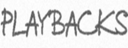

In [55]:
img = Image.open(cvit_img_paths[0])
img

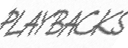

In [73]:
transformed_img = affine(img, angle=0, translate=(0,0), scale=1.0, shear=(35, 0), fill=(255))
transformed_img

## SROIE2019

In [ ]:
# gdown https://drive.google.com/uc?id=1rKcCu6Pi5SB_CbHWnL7Hk2GBwhf1Iz0K

In [ ]:
# ! unzip -q data/SROIE2019/SROIE2019.zip

## COCO-Text

In [41]:
# wget http://images.cocodataset.org/zips/train2014.zip
# unzip -q train2014.zip

In [44]:
! git clone https://github.com/bgshih/coco-text

Cloning into 'coco-text'...
remote: Enumerating objects: 82, done.
remote: Total 82 (delta 0), reused 0 (delta 0), pack-reused 82
Unpacking objects: 100% (82/82), done.


In [54]:
import sys
sys.path.insert(0, 'data/MSCOCO/coco-text/')

import coco_text

In [55]:
ct = coco_text.COCO_Text('data/MSCOCO/cocotext.v2.json')

loading annotations into memory...
0:00:01.943299
creating index...
index created!


In [57]:
ct.info()

In [64]:
imgs_typed = ct.getImgIds(imgIds=ct.train, 
                    catIds=[('class','machine printed')])
len(imgs_typed)

19039

In [68]:
imgs_hw = ct.getImgIds(imgIds=ct.train, 
                    catIds=[('class','handwritten')])
len(imgs_hw)

5

In [69]:
dataDir='data/MSCOCO/'
dataType='train2014'

In [ ]:
%matplotlib inline
import numpy as np
! pip install scikit-image
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [74]:
# pick one at random
img = ct.loadImgs(imgs_typed[np.random.randint(0,len(imgs_typed))])[0]

/images/train2014/COCO_train2014_000000002614.jpg


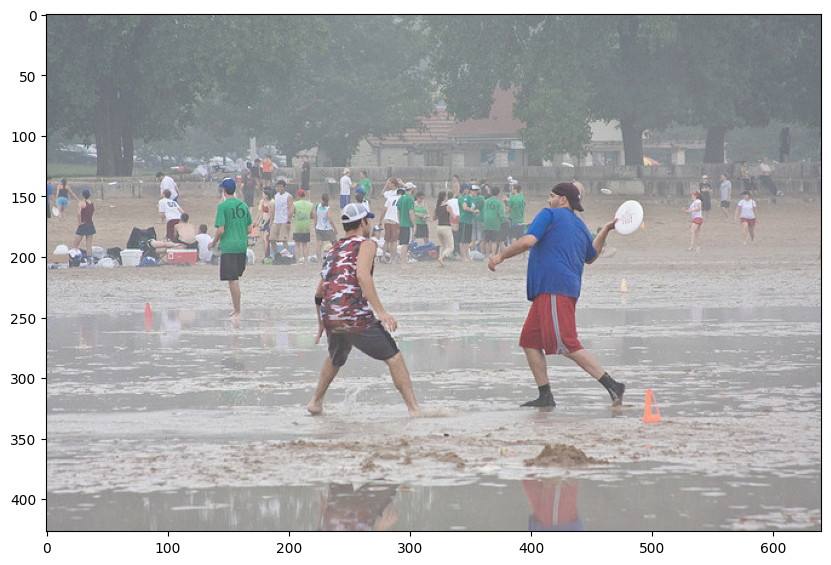

In [77]:
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
print('/images/%s/%s'%(dataType,img['file_name']))
plt.figure()
plt.imshow(I)

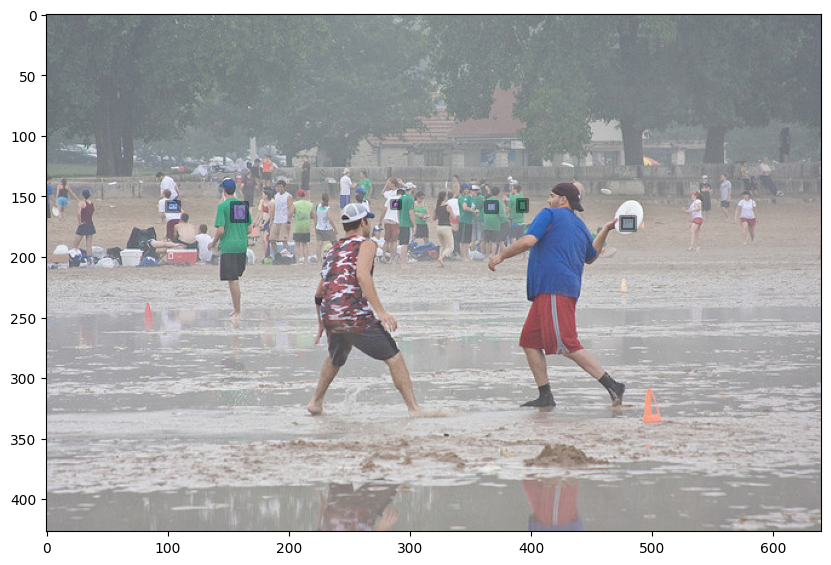

In [78]:
# load and display text annotations
plt.imshow(I)
annIds = ct.getAnnIds(imgIds=img['id'])
anns = ct.loadAnns(annIds)
ct.showAnns(anns)

In [82]:
img

{'id': 2614,
 'set': 'train',
 'width': 640,
 'file_name': 'COCO_train2014_000000002614.jpg',
 'height': 427}

In [83]:
annIds

[64219, 64220, 64221, 64222, 64223, 64224]

In [94]:
for ann in anns:
    print(ann['class'], "-> ", ann['bbox'])

machine printed ->  [99.7, 154.6, 9.4, 7.0]
machine printed ->  [152.8, 155.8, 12.2, 14.5]
machine printed ->  [474.6, 167.1, 11.2, 10.6]
machine printed ->  [285.2, 153.4, 6.8, 6.1]
machine printed ->  [362.4, 154.3, 9.6, 8.4]
machine printed ->  [389.4, 152.7, 7.4, 9.0]


In [115]:
ann

{'mask': [395.5, 87.3, 404.6, 86.5, 404.9, 94.2, 395.8, 95.3],
 'class': 'machine printed',
 'bbox': [395.5, 86.5, 9.4, 8.8],
 'image_id': 262145,
 'id': 64401,
 'language': 'english',
 'area': 71.72,
 'utf8_string': '',
 'legibility': 'illegible'}

In [95]:
# Get all images IDs with machine printed text
imgs_typed = ct.getImgIds(imgIds=ct.train, 
                    catIds=[('class','machine printed')])
len(imgs_typed)

19039

In [135]:
# Get all images IDs with machine printed text
imgs_typed = ct.getImgIds(imgIds=ct.train, 
                    catIds=[('class','handwritten')])
len(imgs_typed)

5

In [136]:
def COCO_crop_images_with_bounding_boxes(image_path, bbox, output_folder, idx):
             
    # Open the image
    image = Image.open(image_path)

    # Crop the image using the bounding box coordinates
    cropped_image = image.crop((bbox[0], bbox[1],
                                bbox[0]+bbox[2], bbox[1]+bbox[3]))
                        
    # print(image_path.split("/")[-1][:-4] + "-"+str(idx)+".jpg")
    # append bounding box id to the cropped image name
    output_path = os.path.join(output_folder, image_path.split("/")[-1][:-4] + "-"+str(idx)+".jpg")
    # Save the cropped image
    cropped_image.save(output_path, "JPEG")

In [137]:
# Get all images using the image IDs
output_folder = "data/all_data/handwritten/"

# Crop machine printed text from images using bounding box coordinates
# and save the cropped images in the "typed" folder
for img_id in range(len(imgs_typed)):
    img = ct.loadImgs(imgs_typed[img_id])[0]
    image_path = "data/MSCOCO/train2014/"+img['file_name']
    
    # Get annotations in the image
    annIds = ct.getAnnIds(imgIds=img['id'])
    anns = ct.loadAnns(annIds)
    
    for ann in anns:
        if(ann['class'] == "handwritten"):
            COCO_crop_images_with_bounding_boxes(image_path, ann['bbox'], output_folder, ann['id'])